In [1]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.stats import SigmaClip
from photutils.background import Background2D, SExtractorBackground
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import little_things_functions as ltf
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
from matplotlib import cm
from scipy.fft import fft2, fftshift

(961, 902)


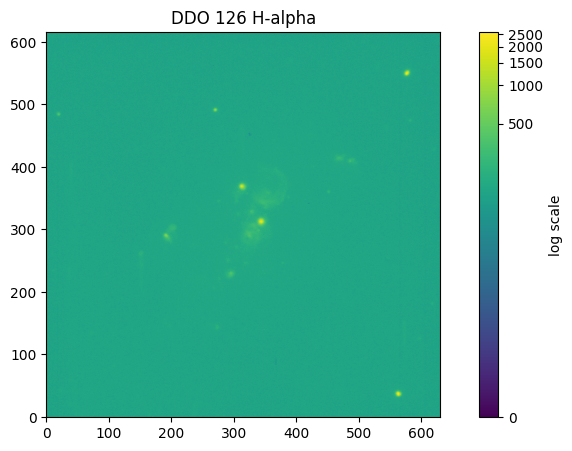

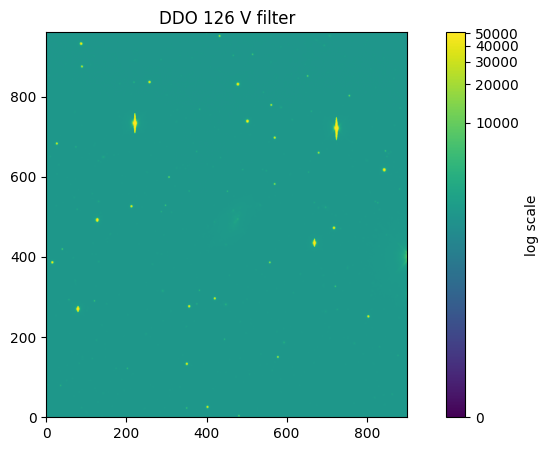

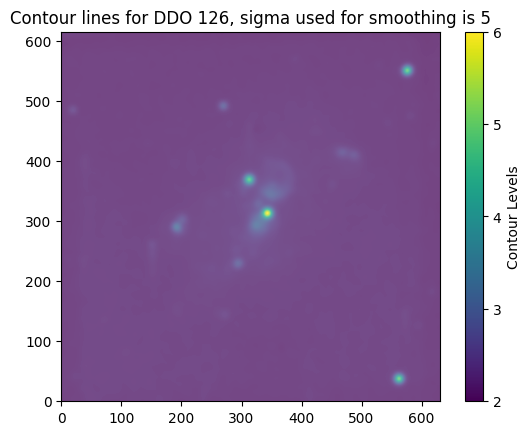

In [2]:
galaxy_name = "DDO 126"
DDO126_H = ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 126\d126ha.fits")
DDO126_V = ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 126\d126v.fits")
print(np.shape(DDO126_V))
ltf.log_scale_plot(DDO126_H, "DDO 126 H-alpha", "log scale")
ltf.log_scale_plot(DDO126_V, "DDO 126 V filter", "log scale")

sigma = 5

# Assuming DDO101_H_replaced is already defined
smoothed = gaussian_filter(DDO126_H, sigma)

fig, ax = plt.subplots()
im = ax.imshow(smoothed, alpha=0.75, origin="lower")

# Create the contour plot
levels = [2, 3, 4, 5, 6]
CS = ax.contour(smoothed, levels, cmap='viridis')

# Create a custom color bar for the contour lines
norm = Normalize(vmin=2, vmax=6)  # Adjust this range according to your contour levels
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add the color bar with labels
cbar = fig.colorbar(sm, ax=ax, ticks=levels)
cbar.ax.set_yticklabels([str(level) for level in levels])
cbar.set_label('Contour Levels')

plt.title(f"Contour lines for {galaxy_name}, sigma used for smoothing is {sigma}")
plt.show()

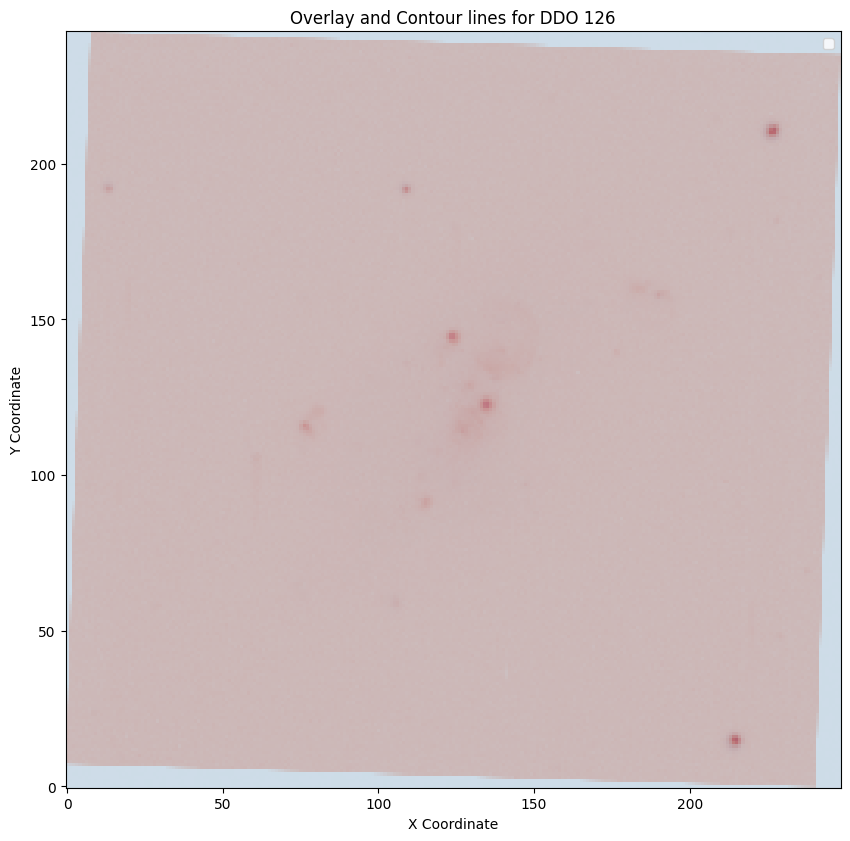

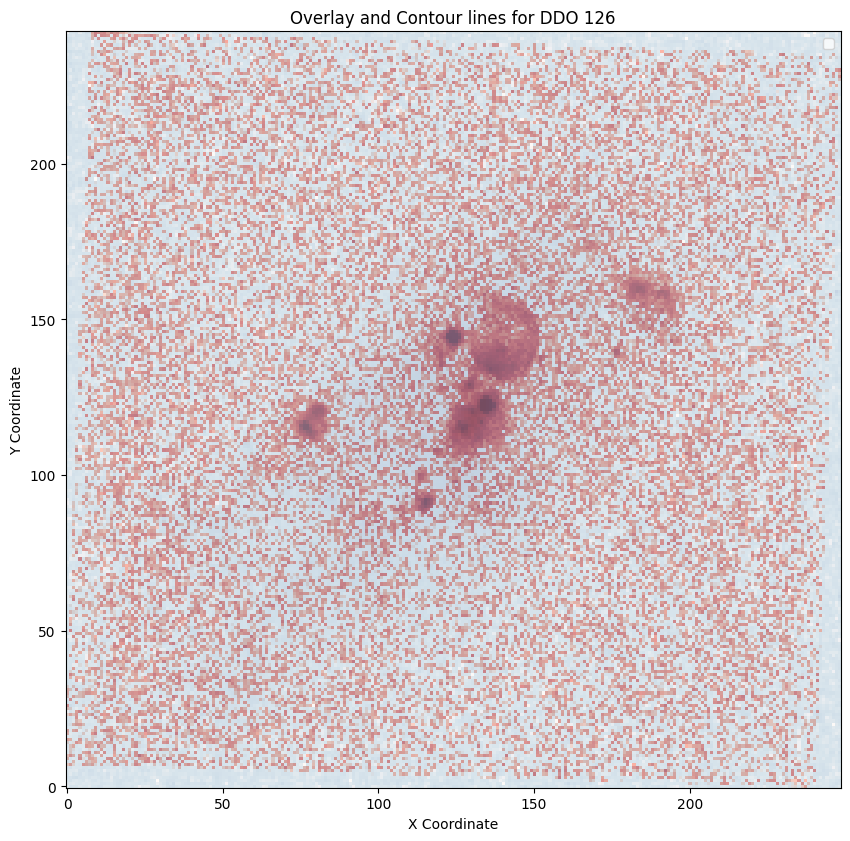

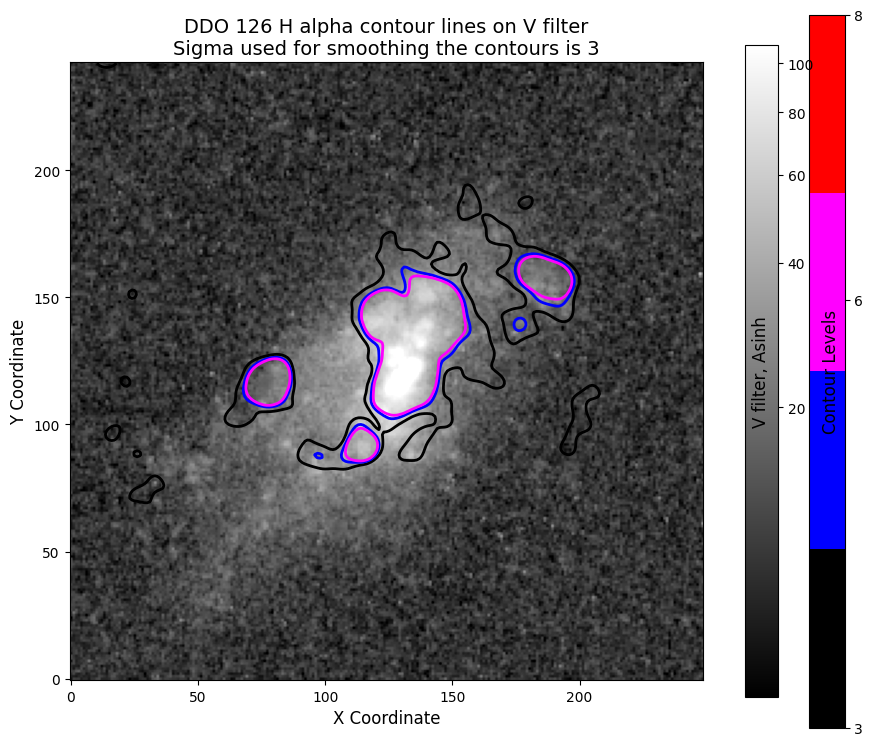

H-alpha pixelscale: 0.43297767223889877
pixelsclae for new images is: 1.1370131810221635
(243, 249) (243, 249) (961, 902) (616, 631)


In [3]:
image1_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 126\d126v.fits"
image2_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 126\d126ha.fits"
output_dir_stars = r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d126\withstars"
output_dir = r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d126"
star_coords_V = np.array([[570,582], [452,563], [558,386]])
star_coords_H = np.array([[577,551], [270,492], [563, 37]])
star_coords_V_new = np.array([[227, 211],[110,193],[215,15]])
V_with_stars, H_with_stars = ltf.V_and_Halpha_alignment(galaxy_name, image1_path, image2_path, star_coords_V, star_coords_H, output_dir_stars, alpha1=0.5, alpha2=0.5)
image1_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d126\starless\starless_DDO126_V_background_subtracted.fit"
image2_path = r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 126\d126hmrms.fits"
V_pixelscale = 1.134
V_image , H_image = ltf.V_and_Halpha_alignment(galaxy_name, image1_path, image2_path, star_coords_V, star_coords_H, output_dir, alpha1=0.5, alpha2=0.5)
ltf.plot_contours_V_and_Halpha(galaxy_name, V_image, H_image, folder_path=r"C:\Users\AYSAN\Desktop\project\Galaxy\H-alpha regions", alpha=1, sigma=3, contour_levels=[3, 6, 8])
H_pixelscale = ltf.calculate_pixelscale(star_coords_V, star_coords_H, V_pixelscale)
new_pixelscale = ltf.calculate_pixelscale(star_coords_V, star_coords_V_new, V_pixelscale)
print("H-alpha pixelscale:", H_pixelscale)
print("pixelsclae for new images is:",new_pixelscale)

print(np.shape(V_image), np.shape(H_image), np.shape(DDO126_V), np.shape(DDO126_H))


# Resolution DDO 126

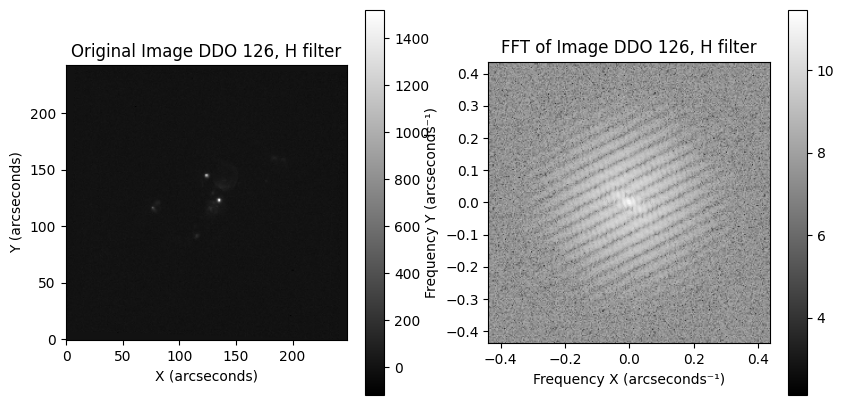

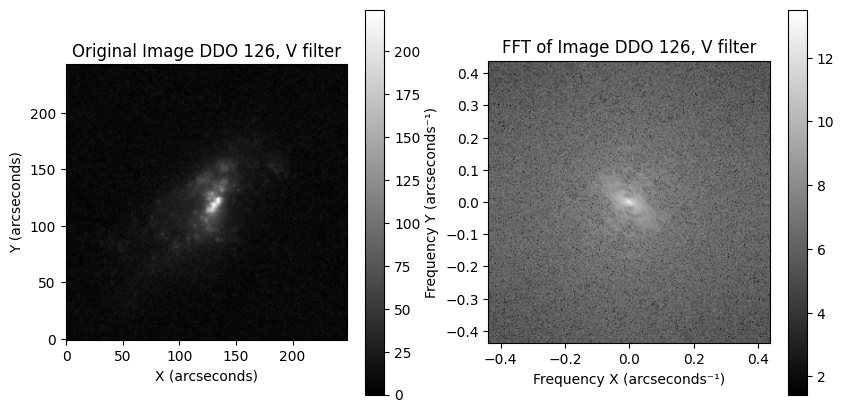

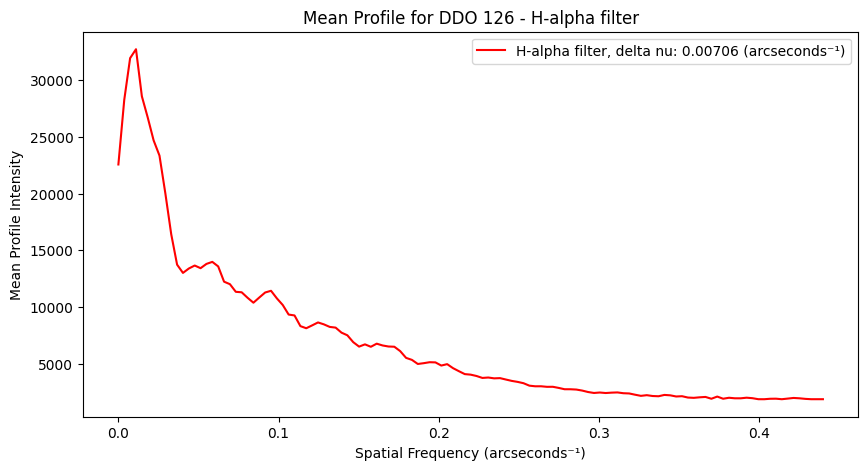

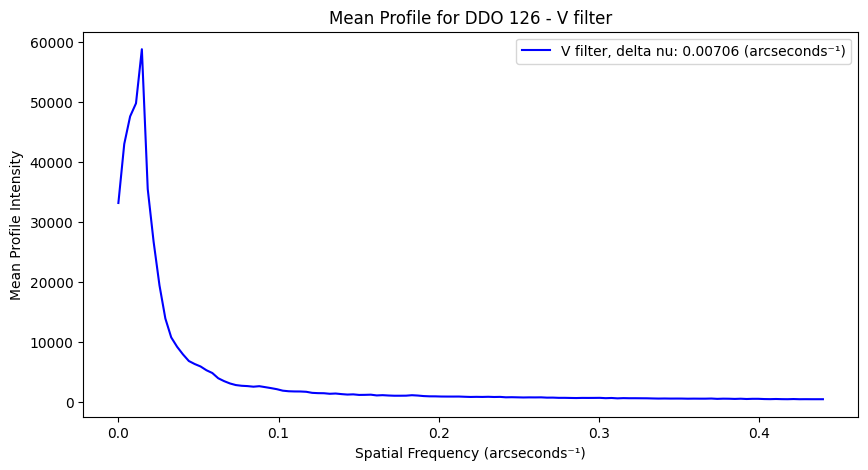

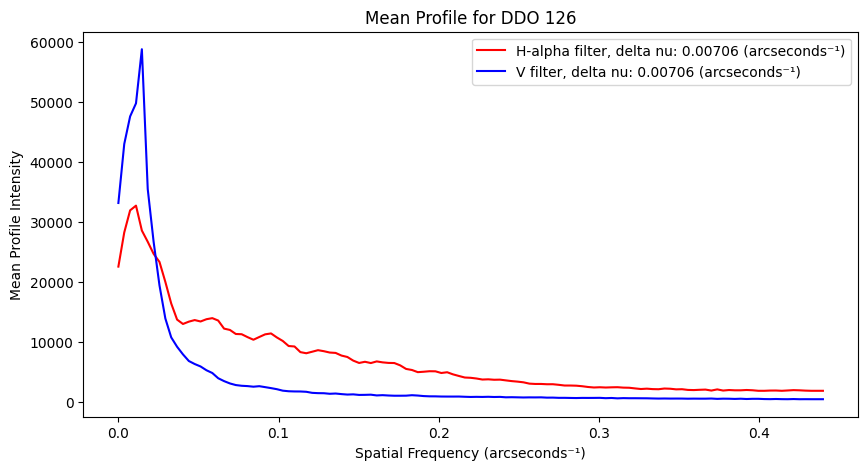

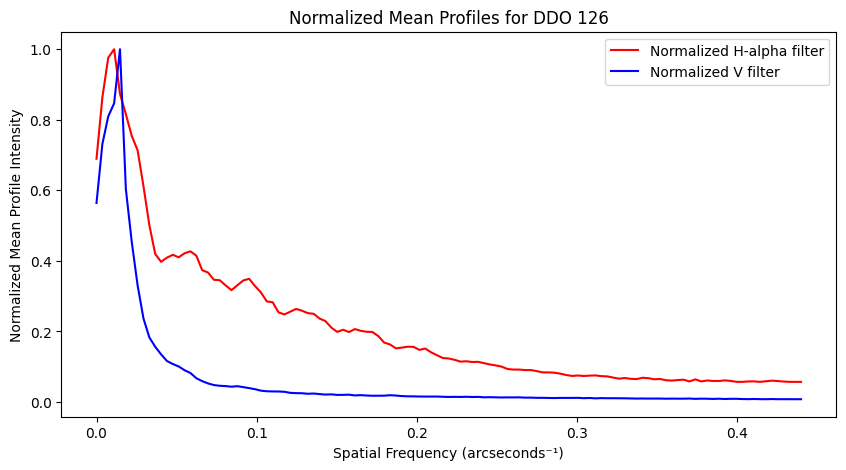

: 

In [ ]:
ltf.resolution_profiles(H_image, V_image, galaxy_name, new_pixelscale, r"C:\Users\AYSAN\Desktop\project\Galaxy\Resolution")